In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('C:/Users/Senthil/Documents/product/statsfinal.csv')  # Replace 'your_file_path.csv' with the actual file path

# Display the first few rows of the data
data.head()

,Unnamed: 0,Date,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4
0,0,13-06-2010,5422,3725,576,907,17187.74,23616.50,3121.92,6466.91
1,1,14-06-2010,7047,779,3578,1574,22338.99,4938.86,19392.76,11222.62
2,2,15-06-2010,1572,2082,595,1145,4983.24,13199.88,3224.90,8163.85
3,3,16-06-2010,5657,2399,3140,1672,17932.69,15209.66,17018.80,11921.36
4,4,17-06-2010,3668,3207,2184,708,11627.56,20332.38,11837.28,5048.04


In [3]:
if 'Unnamed: 0' in data.columns:
    data = data.drop(columns=['Unnamed: 0'])

data['Date'] = pd.to_datetime(data['Date'], errors='coerce')  
data = data.dropna(subset=['Date'])
data.set_index('Date', inplace=True)

# Check for any missing values
data.info()

# Display basic statistics of the data
data.describe()

C:\Users\Senthil\AppData\Local\Temp\ipykernel_8608\3604024517.py:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date'] = pd.to_datetime(data['Date'], errors='coerce')


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4574 entries, 2010-06-13 to 2023-03-02
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Q-P1    4574 non-null   int64  
 1   Q-P2    4574 non-null   int64  
 2   Q-P3    4574 non-null   int64  
 3   Q-P4    4574 non-null   int64  
 4   S-P1    4574 non-null   float64
 5   S-P2    4574 non-null   float64
 6   S-P3    4574 non-null   float64
 7   S-P4    4574 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 321.6 KB


,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4
count,4574.000000,4574.000000,4574.000000,4574.000000,4574.000000,4574.000000,4574.000000,4574.000000
mean,4123.342589,2129.705072,3143.769786,1123.738303,13070.996006,13502.330157,17039.232239,8012.254104
std,2243.691134,1089.503315,1671.052866,497.813557,7112.500894,6907.451018,9057.106532,3549.410662
min,254.000000,251.000000,250.000000,250.000000,805.180000,1591.340000,1355.000000,1782.500000
25%,2149.500000,1167.250000,1695.250000,696.000000,6813.915000,7400.365000,9188.255000,4962.480000
50%,4138.000000,2133.500000,3196.500000,1137.000000,13117.460000,13526.390000,17325.030000,8106.810000
75%,6072.000000,3069.750000,4564.750000,1545.750000,19248.240000,19462.215000,24740.945000,11021.197500
max,7998.000000,3998.000000,6000.000000,2000.000000,25353.660000,25347.320000,32520.000000,14260.000000


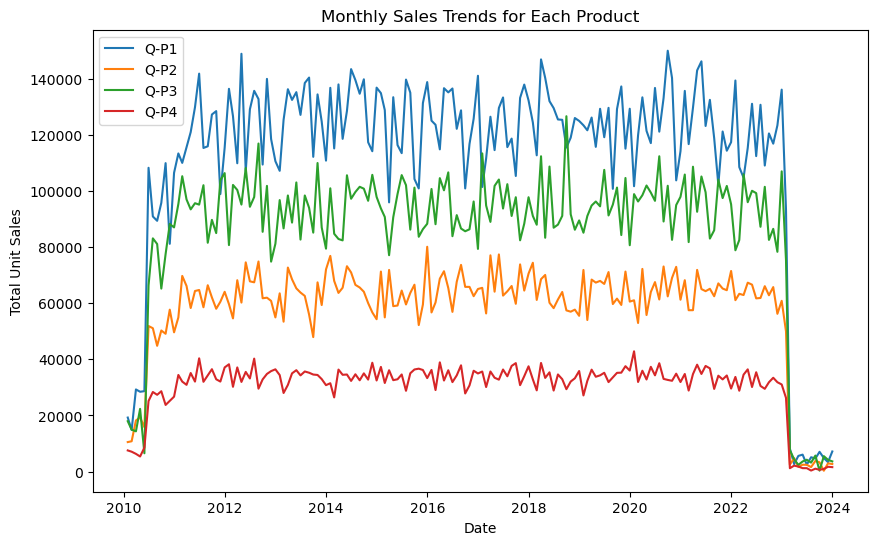

In [4]:
monthly_sales = data.resample('M').sum()

plt.figure(figsize=(10, 6))
for product in ['Q-P1', 'Q-P2', 'Q-P3', 'Q-P4']:
    plt.plot(monthly_sales.index, monthly_sales[product], label=product)

plt.xlabel('Date')
plt.ylabel('Total Unit Sales')
plt.title('Monthly Sales Trends for Each Product')
plt.legend()
plt.show()

In [5]:
# Calculate total unit sales for each product
total_unit_sales = data[['Q-P1', 'Q-P2', 'Q-P3', 'Q-P4']].sum()

# Find the product with the highest total unit sales
top_product = total_unit_sales.idxmax()
top_sales = total_unit_sales.max()

print(f"The top-performing product based on total unit sales is {top_product} with {top_sales} units sold.")


The top-performing product based on total unit sales is Q-P1 with 18860169 units sold.


In [8]:
# Filter data for 31st December
dec_31_sales = data[data.index.day == 31]

# Calculate average units sold on 31st December
avg_units_dec_31 = dec_31_sales[['Q-P1', 'Q-P2', 'Q-P3', 'Q-P4']].mean()

print("Estimated Units Sold on 31st December:")
print(avg_units_dec_31)


Estimated Units Sold on 31st December:
Q-P1    3847.269841
Q-P2    2012.460317
Q-P3    3074.333333
Q-P4    1124.746032
dtype: float64


In [9]:
# Calculate total unit sales and total revenue for each product
total_unit_sales = data[['Q-P1', 'Q-P2', 'Q-P3', 'Q-P4']].sum()
total_revenue = data[['S-P1', 'S-P2', 'S-P3', 'S-P4']].sum()

# Find the product with the lowest total unit sales and revenue (assuming this indicates its contribution)
lowest_sales_product = total_unit_sales.idxmin()
lowest_revenue_product = total_revenue.idxmin()

# Calculate the percentage contribution of each product to total sales and revenue
sales_contribution = total_unit_sales / total_unit_sales.sum() * 100
revenue_contribution = total_revenue / total_revenue.sum() * 100

print(f"The product with the lowest total unit sales is {lowest_sales_product}.")
print(f"The product with the lowest total revenue is {lowest_revenue_product}.")

print("\nSales Contribution (%):")
print(sales_contribution)

print("\nRevenue Contribution (%):")
print(revenue_contribution)


The product with the lowest total unit sales is Q-P4.
The product with the lowest total revenue is S-P4.

Sales Contribution (%):
Q-P1    39.193201
Q-P2    20.243275
Q-P3    29.882165
Q-P4    10.681359
dtype: float64

Revenue Contribution (%):
S-P1    25.319213
S-P2    26.154730
S-P3    33.005897
S-P4    15.520161
dtype: float64


In [10]:
# Calculate annual averages for sales and revenues
annual_sales = data[['Q-P1', 'Q-P2', 'Q-P3', 'Q-P4']].resample('A').sum()
annual_revenue = data[['S-P1', 'S-P2', 'S-P3', 'S-P4']].resample('A').sum()

# Create a dataframe for 2024 with dates from January to December
dates_2024 = pd.date_range(start='2024-01-01', end='2024-12-31', freq='D')
df_2024 = pd.DataFrame(index=dates_2024)

# Calculate moving averages for sales and revenues
for product in ['Q-P1', 'Q-P2', 'Q-P3', 'Q-P4']:
    df_2024[f'MA-{product}'] = data[product].rolling(window=365, min_periods=1).mean()

for product in ['S-P1', 'S-P2', 'S-P3', 'S-P4']:
    df_2024[f'MA-{product}'] = data[product].rolling(window=365, min_periods=1).mean()

# Extract the predicted values for 2024
predicted_sales_2024 = df_2024[['MA-Q-P1', 'MA-Q-P2', 'MA-Q-P3', 'MA-Q-P4']].iloc[-1]
predicted_revenue_2024 = df_2024[['MA-S-P1', 'MA-S-P2', 'MA-S-P3', 'MA-S-P4']].iloc[-1]

print("Predicted Sales for 2024:")
print(predicted_sales_2024)

print("\nPredicted Revenue for 2024:")
print(predicted_revenue_2024)


Predicted Sales for 2024:
MA-Q-P1   NaN
MA-Q-P2   NaN
MA-Q-P3   NaN
MA-Q-P4   NaN
Name: 2024-12-31 00:00:00, dtype: float64

Predicted Revenue for 2024:
MA-S-P1   NaN
MA-S-P2   NaN
MA-S-P3   NaN
MA-S-P4   NaN
Name: 2024-12-31 00:00:00, dtype: float64
